### Re-code the house price machine learning

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston

In [2]:
#导出数据，X为特征，y为房价
data = load_boston()
X,y = data['data'], data['target']
print(X.shape,len(y))

(506, 13) 506


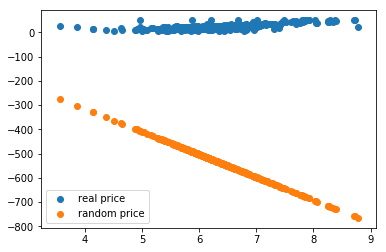

In [3]:
#以X中的一个特征和y作图
def price(rm,k,b):
    return rm * k + b
#选择X的第五个特征，房间数量
X_rm = X[:,5]
k = random.randint(-100,100)
b = random.randint(-100,100)
price_by_random = [price(r,k,b) for r in X_rm]

plt.scatter(X_rm,y,label="real price")
plt.scatter(X_rm,price_by_random,label="random price")
plt.legend()

### 1.Random Choose Method to get optimal k and b

In [4]:
#为了得到最优的k和b，这里引入loss函数去衡量k和b的好坏
#这里的loss为平方损失函数
def loss(y,y_hat):
    return sum(np.square(y_i - y_hat_i) for y_i,y_hat_i in zip(list(y),list(y_hat))) / len(list(y))

In [5]:
trying_times = 2000
min_loss = float('inf')
best_k,best_b = None,None

for i in range(trying_times):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_by_random = [price(r,k,b) for r in X_rm]
    
    current_loss = loss(y,price_by_random)
    if current_loss < min_loss:
        min_loss = current_loss
        best_b,best_k = b,k
        print("In loop: {},b: {}, k: {}, loss: {}".format(i,best_b,best_k,min_loss))

In loop: 0,b: -4.252579971588716, k: 39.21581343757484, loss: 48746.03359895356
In loop: 1,b: -53.084857928602005, k: 22.717204045308875, loss: 4644.276966473865
In loop: 6,b: -16.55751745808473, k: 9.014861042089436, loss: 352.12586616840565
In loop: 56,b: -4.24004940580889, k: 5.697742556511372, loss: 130.94871334802647
In loop: 138,b: -56.23014196483487, k: 11.556552794683839, loss: 84.19758333573853
In loop: 430,b: -53.969396852973816, k: 12.28542811786923, loss: 49.09345026603715
In loop: 748,b: -32.043610477316435, k: 8.54918393015231, loss: 44.47015241756203


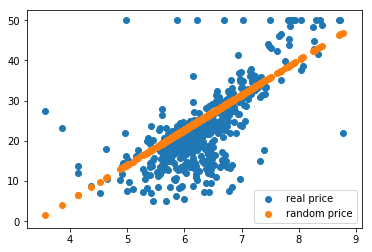

In [6]:
k=8.711909580060166
b=-29.53033915717809
price_by_random = [price(r,k,b) for r in X_rm]

plt.scatter(X_rm,y,label="real price")
plt.scatter(X_rm,price_by_random,label="random price")
plt.legend()

In [20]:
import pandas as pd

In [22]:
df = pd.DataFrame(X,columns=data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### 2.Supervised Direction to get optimal k and b

In [8]:
trying_times = 2000
min_loss = float('inf')
best_k,best_b = random.random() * 200 - 100,random.random() * 200 - 100

direction = [(+1,-1),(+1,-1),(+1,-1),(+1,-1)]
next_direction = random.choice(direction)
scalar = 0.1

for i in range(trying_times):
    k_direction,b_direction = next_direction
    current_k,current_b = best_k + k_direction*scalar, best_b + b_direction*scalar
    price_by_random = [price(r,current_k,current_b) for r in X_rm]
    
    current_loss = loss(y,price_by_random)
    if current_loss < min_loss:
        min_loss = current_loss
        best_b,best_k = current_b,current_k
    if i % 100 ==0:
        print("In loop: {},b: {}, k: {}, loss: {}".format(i,best_b,best_k,min_loss))
    else:
        next_direction = random.choice(direction)

In loop: 0,b: 75.56418803718921, k: -55.857942861818366, loss: 90935.83878237748
In loop: 100,b: 65.56418803718978, k: -45.85794286181822, loss: 61639.68912180456
In loop: 200,b: 55.564188037189744, k: -35.85794286181808, loss: 38027.5506260543
In loop: 300,b: 45.5641880371896, k: -25.85794286181794, loss: 20099.423295126395
In loop: 400,b: 35.56418803718946, k: -15.8579428618178, loss: 7855.307129020774
In loop: 500,b: 25.564188037189318, k: -5.857942861817836, loss: 1295.202127737529
In loop: 600,b: 19.064188037189226, k: 0.6420571381821599, loss: 79.1848640392415
In loop: 700,b: 19.064188037189226, k: 0.6420571381821599, loss: 79.1848640392415
In loop: 800,b: 19.064188037189226, k: 0.6420571381821599, loss: 79.1848640392415
In loop: 900,b: 19.064188037189226, k: 0.6420571381821599, loss: 79.1848640392415
In loop: 1000,b: 19.064188037189226, k: 0.6420571381821599, loss: 79.1848640392415
In loop: 1100,b: 19.064188037189226, k: 0.6420571381821599, loss: 79.1848640392415
In loop: 1200,b

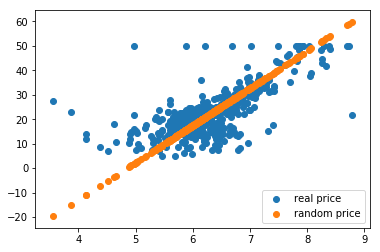

In [9]:
k=15.235611907164557
b=-73.9635581451873
price_by_random = [price(r,k,b) for r in X_rm]

plt.scatter(X_rm,y,label="real price")
plt.scatter(X_rm,price_by_random,label="random price")
plt.legend()

### 3.Gradient Descent to get optimal k and b

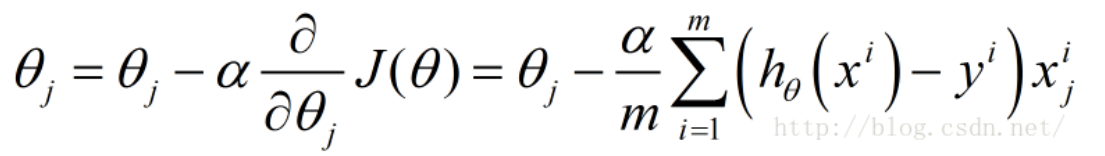

In [19]:
trying_times = 2000
min_loss = float('inf')
best_k,best_b = random.random() * 200 - 100,random.random() * 200 - 100
n = 0
alpha = 0.005
diff = 0


for x in range(trying_times):
    price_by_random = [price(r,best_k,best_b) for r in X_rm]
    gradient_loss = loss(y,price_by_random)
    if gradient_loss < min_loss:
        min_loss = gradient_loss
    if x % 100 == 0:
        print("In loop: {},k: {}, b: {}, loss: {}".format(x,best_k,best_b,gradient_loss))   
    diff_k,diff_b =0,0
    for i in range(len(X_rm)):
        #y = x0*k + x1*b, 其中x1=1
        diff_k += (best_k * X_rm[i-1] + best_b - y[i-1]) * X_rm[i-1]
        diff_b += (best_k * X_rm[i-1] + best_b - y[i-1]) * 1
    #梯度下降
    best_k -= alpha * diff_k / len(X_rm)
    best_b -= alpha * diff_b / len(X_rm)

In loop: 0,k: 86.3177051584795, b: -37.715174714119605, loss: 235524.27990446182
In loop: 100,k: 11.417463620608006, b: -49.398864818214854, loss: 46.27318503246349
In loop: 200,k: 11.403585489043163, b: -49.31058443945989, loss: 46.24124178523416
In loop: 300,k: 11.389790550542262, b: -49.22283320771938, loss: 46.20968032291268
In loop: 400,k: 11.37607829823329, b: -49.1356079526035, loss: 46.17849608241531
In loop: 500,k: 11.362448236499214, b: -49.048905521433824, loss: 46.14768455519592
In loop: 600,k: 11.348899872693725, b: -48.96272278042904, loss: 46.11724128659468
In loop: 700,k: 11.335432717123405, b: -48.877056614591496, loss: 46.08716187519355
In loop: 800,k: 11.322046283030026, b: -48.79190392759473, loss: 46.05744197218018
In loop: 900,k: 11.308740086572985, b: -48.7072616416715, loss: 46.02807728071919
In loop: 1000,k: 11.295513646811775, b: -48.623126697502535, loss: 45.99906355533073
In loop: 1100,k: 11.282366485688645, b: -48.53949605410602, loss: 45.97039660127698
In 

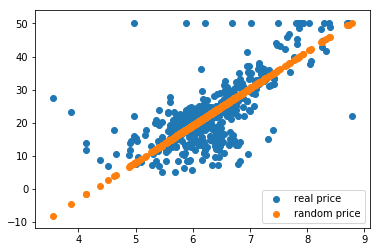

In [20]:
k=11.17998679845482
b=-47.88824678181757
price_by_random = [price(r,k,b) for r in X_rm]

plt.scatter(X_rm,y,label="real price")
plt.scatter(X_rm,price_by_random,label="random price")
plt.legend()

### 4. Try different Loss function and learning rate.

In [21]:
def loss_2(y,y_hat):
    return sum(abs(y_i - y_hat_i) for y_i,y_hat_i in zip(list(y),list(y_hat))) / len(list(y))

In [22]:
#绝对损失函数 & 随机选择k,b
trying_times = 2000
min_loss = float('inf')
best_k,best_b = None,None

for i in range(trying_times):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_by_random = [price(r,k,b) for r in X_rm]
    
    current_loss = loss_2(y,price_by_random)
    if current_loss < min_loss:
        min_loss = current_loss
        best_b,best_k = b,k
        print("In loop: {},k: {}, b: {}, loss: {}".format(i,best_k,best_b,min_loss))

In loop: 0,k: -73.19116864153558, b: 50.608252344005024, loss: 431.90428927516353
In loop: 1,k: 37.249752628590926, b: 50.160094744997764, loss: 261.7283647108771
In loop: 2,k: 49.99807339370153, b: -61.71776574846382, loss: 229.96903927882016
In loop: 3,k: -27.696441581182, b: 81.33767805691946, loss: 115.25713743556726
In loop: 4,k: 13.289996539265857, b: -85.98929005217235, loss: 25.03409739277758
In loop: 12,k: 16.444964242513052, b: -87.90646060723651, loss: 8.624238189957053
In loop: 114,k: -0.18381854804697184, b: 24.76017668789507, loss: 6.993442933979184
In loop: 547,k: 6.553632832121565, b: -17.549866486573237, loss: 4.892533579070292
In loop: 1043,k: 9.647978132265905, b: -37.50865804041803, loss: 4.454819376777994


In [26]:
#绝对损失函数 & 有监督的选择方向
trying_times = 2000
min_loss = float('inf')
best_k,best_b = random.random() * 200 - 100,random.random() * 200 - 100

direction = [(+1,-1),(+1,-1),(+1,-1),(+1,-1)]
next_direction = random.choice(direction)
scalar = 0.1

for i in range(trying_times):
    k_direction,b_direction = next_direction
    current_k,current_b = best_k + k_direction*scalar, best_b + b_direction*scalar
    price_by_random = [price(r,current_k,current_b) for r in X_rm]
    
    current_loss = loss_2(y,price_by_random)
    if current_loss < min_loss:
        min_loss = current_loss
        best_b,best_k = current_b,current_k
    else:
        next_direction = random.choice(direction)

    if i % 100 == 0:
        print("In loop: {},b: {}, k: {}, loss: {}".format(i,best_b,best_k,min_loss))

In loop: 0,b: -1.531435297560185, k: -40.80567810068801, loss: 280.51300941246217
In loop: 100,b: -11.531435297560162, k: -30.80567810068787, loss: 227.66666553894348
In loop: 200,b: -21.531435297560225, k: -20.80567810068773, loss: 174.8203216654247
In loop: 300,b: -31.531435297560368, k: -10.805678100687679, loss: 121.9739777919069
In loop: 400,b: -41.531435297560506, k: -0.8056781006877005, loss: 69.12763391838939
In loop: 500,b: -51.53143529756065, k: 9.194321899312284, loss: 16.347281572132278
In loop: 600,b: -54.63143529756069, k: 12.294321899312273, loss: 4.62359939103832
In loop: 700,b: -54.63143529756069, k: 12.294321899312273, loss: 4.62359939103832
In loop: 800,b: -54.63143529756069, k: 12.294321899312273, loss: 4.62359939103832
In loop: 900,b: -54.63143529756069, k: 12.294321899312273, loss: 4.62359939103832
In loop: 1000,b: -54.63143529756069, k: 12.294321899312273, loss: 4.62359939103832
In loop: 1100,b: -54.63143529756069, k: 12.294321899312273, loss: 4.62359939103832
In

In [33]:
#绝对损失函数 & 梯度下降法
#这里的梯度是基于平方损失函数得来的
trying_times = 2000
min_loss = float('inf')
best_k,best_b = random.random() * 200 - 100,random.random() * 200 - 100
n = 0
alpha = 0.001
diff = 0

while n < trying_times:
    diff_k,diff_b =0,0
    for i in range(len(X_rm)):
        #y = x0*k + x1*b, 其中x1=1
        diff_k += (best_k * X_rm[i-1] + best_b - y[i-1]) * X_rm[i-1]
        diff_b += (best_k * X_rm[i-1] + best_b - y[i-1]) * 1
    n += 1
    #梯度下降
    best_k -= alpha * diff_k / len(X_rm)
    best_b -= alpha * diff_b / len(X_rm)
    
    price_by_random = [price(r,best_k,best_b) for r in X_rm]
    gradient_loss = loss_2(y,price_by_random)
    if gradient_loss < min_loss:
        min_loss = gradient_loss
    if n % 100 == 0:
        print("In loop: {},k: {}, b: {}, loss: {}".format(n,best_k,best_b,min_loss))

In loop: 100,k: 14.3098388026691, b: -69.77936455915942, loss: 5.594650839008614
In loop: 200,k: 14.602612332468393, b: -69.69016702941917, loss: 5.169786126898373
In loop: 300,k: 14.6005589023471, b: -69.64736966997563, loss: 5.165944724458225
In loop: 400,k: 14.594021133556803, b: -69.60532908648331, loss: 5.164141742385202
In loop: 500,k: 14.587422857086427, b: -69.56334976801982, loss: 5.162371915164005
In loop: 600,k: 14.580831467775788, b: -69.52142105758604, loss: 5.160604686805648
In loop: 700,k: 14.574247983110721, b: -69.47954273311403, loss: 5.158839589224242
In loop: 800,k: 14.567672409221792, b: -69.43771473160075, loss: 5.157076612774888
In loop: 900,k: 14.561104736841166, b: -69.39593699253831, loss: 5.155315754800779
In loop: 1000,k: 14.554544956477672, b: -69.35420945552855, loss: 5.153557012754623
In loop: 1100,k: 14.547993058647956, b: -69.31253206024634, loss: 5.151800384093799
In loop: 1200,k: 14.541449033880006, b: -69.27090474643919, loss: 5.150045866278765
In lo